In [1]:
%load_ext autoreload
%autoreload 2
from dnafiber.data.utils import read_czi, read_tiff
# If you are using jpeg or png files, we expect them to already be processed. 
# You can simply read them with PIL or OpenCV.
from dnafiber.deployment import _get_model, MODELS_ZOO, format_results
from dnafiber.inference import infer
from dnafiber.postprocess.core import refine_segmentation
import matplotlib.pyplot as plt
import cv2

c:\Users\cleme\miniconda3\envs\torch\Lib\site-packages\kornia\feature\lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
C:\Users\cleme\AppData\Roaming\Python\Python312\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


<ImageDocument>
  <Metadata>
    <Experiment Version="1.2">
      <RunMode>OptimizeBeforePerformEnabled,ValidateAndAdaptBeforePerformEnabled,TimeStitchLoopedBlockEnabled</RunMode>
      <BeforeHardwareSetting>Before Exp [AF488, AF594, DAPI] Smart</BeforeHardwareSetting>
      <AfterHardwareSetting>After Exp [AF488, AF594, DAPI] Smart</AfterHardwareSetting>
      <ExperimentBlockIndex>0</ExperimentBlockIndex>
      <IsSegmented>false</IsSegmented>
      <IsStandardMode>true</IsStandardMode>
      <ImageTransferMode>MemoryMappedAndFileStream</ImageTransferMode>
      <AutoSave IsActivated="true" EnableSingleFileSave="false">
        <StorageFolder>C:\Users\bioimagerie\Documents\Wurtele\Yosra\YM-2025-10</StorageFolder>
        <Name>siNT</Name>
        <IsAutoSubFolder>true</IsAutoSubFolder>
        <AlwaysAddFileIndex>true</AlwaysAddFileIndex>
        <IsAutoSubFolderExternal>true</IsAutoSubFolderExternal>
        <IsClosedOnCompletion>false</IsClosedOnCompletion>
        <InitialIndex>1

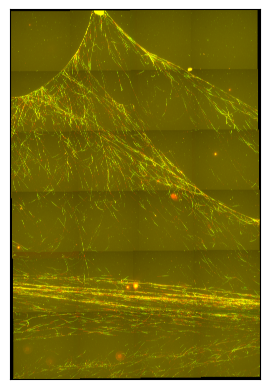

In [6]:
ROOT_IMG = "PATH TO YOUR IMAGE FILE.CZI"  # or .TIFF # or .JPEG or .PNG
ROOT_IMG = "c:/Users/cleme/OneDrive/Documents/postdoc/data/allkindoffibers/YM-2025-10_siNT-02.czi"
pixel_size = 0.13 # Pixel size in micrometers
device = "cuda"  # or "cpu"

img = read_czi(ROOT_IMG, True)  # or read_tiff(ROOT_IMG)
# img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)  # Resize if needed
# model = _get_model(MODELS_ZOO["SegFormer MiT-B4"]+ "_finetuned")

# predicted = infer(model, img, scale=pixel_size, device=device) 
# # This may take a while depending on the size of the image and your GPU.
# refined = refine_segmentation(predicted)
# dataframe = format_results(refined, pixel_size=pixel_size)
# dataframe
plt.imshow(img)  
# Remove xlabel, ylabel, margin, and ticks, grids
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])
plt.margins(0, 0)
plt.grid(False)
plt.show()

In [8]:
import xml.etree.ElementTree as ET
from czifile import CziFile
czi = CziFile(ROOT_IMG)
root = ET.fromstring(czi.metadata())
channels = root.findall(".//Channels/Channel")
channel_names = [c.attrib["Name"] for c in channels]
print("Channel order in file:", channel_names)

Channel order in file: ['Bright_preview', 'DAPI', 'AF488', 'AF594', 'AF647', 'AF488', 'AF594', 'AF488', 'AF594']
